In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
file_path = ["Data Set/ARUNACHAL_PRADESH.csv","Data Set/ASSAM.csv","Data Set/BIHAR.csv","Data Set/DELHI.csv","Data Set/GOA.csv","Data Set/GUJARAT.csv",
             "Data Set/HIMACHAL_PRADESH.csv","Data Set/JHARKHAND.csv","Data Set/KARNATAKA.csv","Data Set/KERALA.csv","Data Set/MAHARASHTRA.csv",
             "Data Set/MANIPUR.csv","Data Set/MIZORAM.csv","Data Set/NAGALAND.csv","Data Set/ODISHA.csv","Data Set/PUDUCHERRY.csv","Data Set/RAJASTHAN.csv",
             "Data Set/SIKKIM.csv","Data Set/TAMIL_NADU.csv","Data Set/TRIPURA.csv","Data Set/UTTAR_PRADESH.csv","Data Set/UTTARAKHAND.csv","Data Set/WEST_BENGAL.csv"
             ]

In [97]:
dataframes = [pd.read_csv(file, encoding='latin1') for file in file_path]
df = pd.concat(dataframes, ignore_index=True)
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0000,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0
195141,`19,`345,District - Purba Medinipur,`99,`991,`0000,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195142,`19,`345,District - Purba Medinipur,`99,`991,`9910,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195143,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,932,14872,3352,11520,13204,2934,10270,1668,418,1250


In [98]:
# Remove backticks from specific columns

df['State Code'] = df['State Code'].str.replace('`', '')
df['District Code'] = df['District Code'].str.replace('`', '')
df['Division'] = df['Division'].str.replace('`', '')
df['Group'] = df['Group'].str.replace('`', '')
df['Class'] = df['Class'].str.replace('`', '')

In [99]:
df.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,12,000,STATE - ARUNACHAL PRADESH,00,000,0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,12,000,STATE - ARUNACHAL PRADESH,01,000,0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223


In [100]:
df["NIC Name"].mode()

0    Construction of buildings
Name: NIC Name, dtype: object

In [101]:
# Replacing where NIC Name is 'Blank' and 'Total' to Construction of buildings

df['NIC Name'] = df['NIC Name'].replace('Blank', 'Construction of buildings')
df['NIC Name'] = df['NIC Name'].replace('Total', 'Construction of buildings')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [103]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Main Workers - Total - Persons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
Main Workers - Total - Males,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
Main Workers - Total - Females,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
Main Workers - Rural - Persons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
Main Workers - Rural - Males,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0
Main Workers - Rural - Females,195145.0,143.583407,4314.446369,0.0,0.0,0.0,8.0,1323903.0
Main Workers - Urban - Persons,195145.0,831.518799,25867.811792,0.0,2.0,12.0,86.0,8849315.0
Main Workers - Urban - Males,195145.0,676.135837,21673.393792,0.0,1.0,9.0,67.0,7354862.0
Main Workers - Urban - Females,195145.0,155.382961,4531.592781,0.0,0.0,0.0,12.0,1494453.0
Marginal Workers - Total - Persons,195145.0,364.267186,11769.400296,0.0,0.0,4.0,28.0,3834122.0


In [105]:
df.columns.tolist()

['State Code',
 'District Code',
 'India/States',
 'Division',
 'Group',
 'Class',
 'NIC Name',
 'Main Workers - Total -  Persons',
 'Main Workers - Total - Males',
 'Main Workers - Total - Females',
 'Main Workers - Rural -  Persons',
 'Main Workers - Rural - Males',
 'Main Workers - Rural - Females',
 'Main Workers - Urban -  Persons',
 'Main Workers - Urban - Males',
 'Main Workers - Urban - Females',
 'Marginal Workers - Total -  Persons',
 'Marginal Workers - Total - Males',
 'Marginal Workers - Total - Females',
 'Marginal Workers - Rural -  Persons',
 'Marginal Workers - Rural - Males',
 'Marginal Workers - Rural - Females',
 'Marginal Workers - Urban -  Persons',
 'Marginal Workers - Urban - Males',
 'Marginal Workers - Urban - Females']

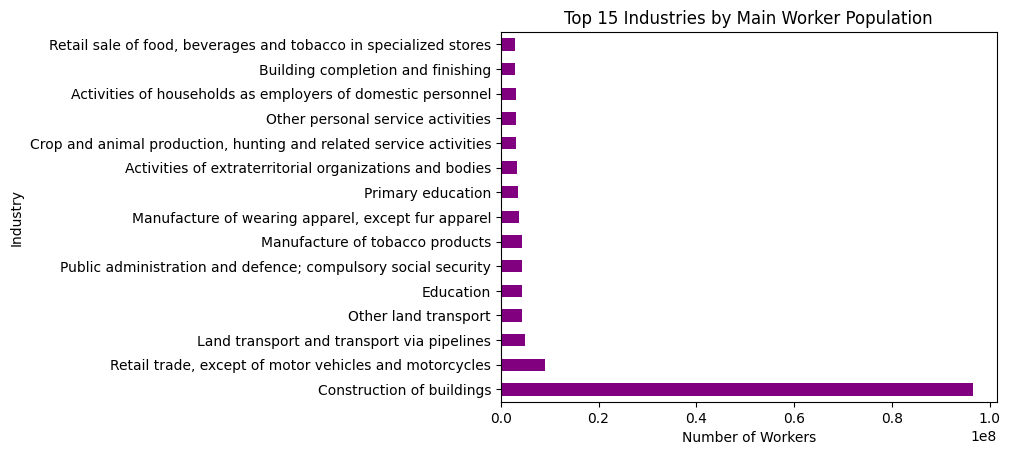

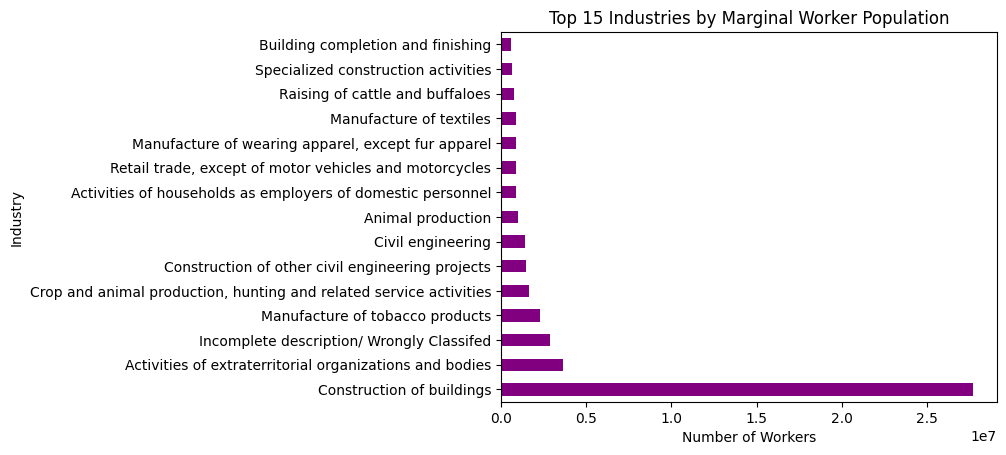

In [106]:
# Main Workers grouped by industry sector (NIC Name)
main_sector_workers = df.groupby('NIC Name')['Main Workers - Total -  Persons'].sum().sort_values(ascending=False).head(15)

# Bar chart of top 15 industries
main_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Main Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()


# Marginal Workers grouped by industry sector (NIC Name)
marginal_sector_workers = df.groupby('NIC Name')['Marginal Workers - Total -  Persons'].sum().sort_values(ascending=False).head(15)

# Bar chart of top 15 industries
marginal_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Marginal Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()

Main Workers - Rural -  Persons        128916440
Main Workers - Urban -  Persons        162266736
Marginal Workers - Rural -  Persons     48830864
Marginal Workers - Urban -  Persons     22254056
dtype: int64


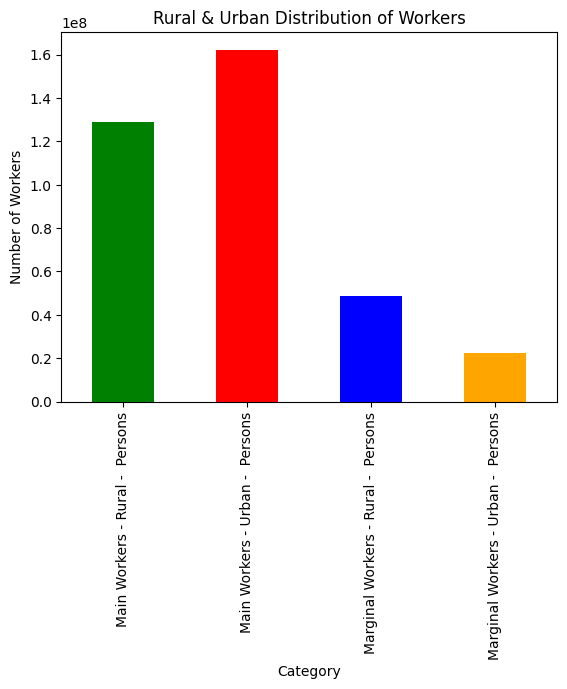

In [107]:
# Workers Rural & Urban distribution
rural_urban_distribution = df[['Main Workers - Rural -  Persons', 'Main Workers - Urban -  Persons',
                  'Marginal Workers - Rural -  Persons', 'Marginal Workers - Urban -  Persons']].sum()
print(rural_urban_distribution)

# Bar chart for rural & urban distribution
rural_urban_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Rural & Urban Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

Main Workers - Total - Males          232841384
Main Workers - Total - Females         58341792
Marginal Workers - Total - Males       35639760
Marginal Workers - Total - Females     35445160
dtype: int64


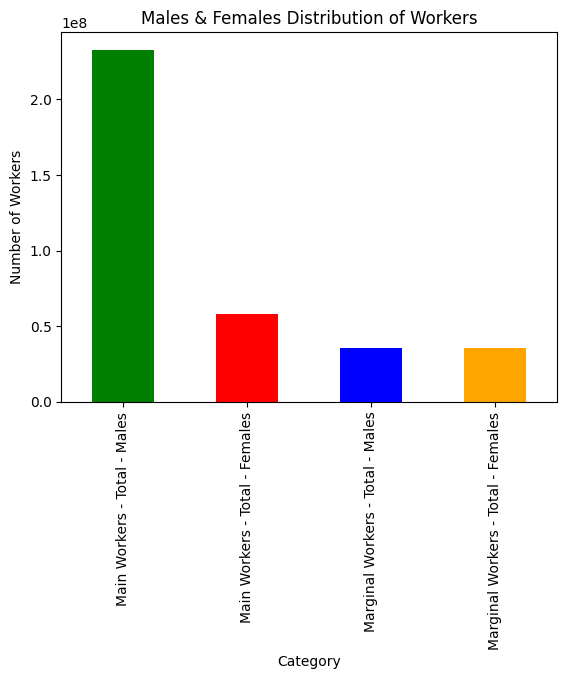

In [108]:
# Males & Females distribution
males_females_distribution = df[['Main Workers - Total - Males', 'Main Workers - Total - Females',
                    'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']].sum()
print(males_females_distribution)

# Bar chart for rural & urban distribution
males_females_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Males & Females Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

In [109]:
# df["State Code"].unique()

In [110]:
# df_s = df[df["State Code"] == "12"]
# df_s["District Code"].unique()

In [111]:
# df_d = df_s[df_s["District Code"] == "246"]
# df_d

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Industry Group'] = label_encoder.fit_transform(df['NIC Name'])

In [117]:
df_industry = df[["NIC Name", "Industry Group"]]            
df_industry.drop_duplicates().sort_values(by= "Industry Group").head(50)

,NIC Name,Industry Group
383,Accommodation,0
466,"Accounting, bookkeeping and auditing activitie...",1
17260,Activities auxiliary to financial service acti...,2
7031,Activities auxiliary to financial service acti...,3
453,Activities auxiliary to insurance and pension ...,4
584,Activities of amusement parks and theme parks,5
588,Activities of business and employers membershi...,6
587,"Activities of business, employers and professi...",7
519,Activities of call centres,8
524,Activities of collection agencies and credit b...,9
